# Refractive Index Sensitivity Simulation: Increment of Glycerol Concentration

In [323]:
%pylab inline

from pame.simparser import LayerSimParser #Interface for handling simulation results
from skspec import *
from skspec.plotting import splot
from skspec.data import aunps_glass

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [324]:
import skspec.plotting.plot_utils as pv_utils

DPI = 600
TEXTSIZE = 15
TICKSIZE = 13
LEGENDSIZE = 11 #<--- I don't think this is used
LINEWIDTH = 2.5

# # Labels
rcParams['axes.labelsize'] = TICKSIZE
rcParams['xtick.labelsize'] = TICKSIZE
rcParams['ytick.labelsize'] = TICKSIZE

# Font and text
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']  # Also used by latex (this is default already)
#rcParams['font.weight'] = 'bold'  # These don't work
#rcParams['font.style'] = 'oblique'
rcParams['font.size'] = TEXTSIZE     #Matplotlib title, labels

#Lines
rcParams['lines.linewidth'] = LINEWIDTH

# # Legend
rcParams['legend.loc'] = 'upper right'
rcParams['legend.fontsize'] = LEGENDSIZE
rcParams['legend.fancybox'] = True
rcParams['legend.scatterpoints'] = 1  # Draw one scatter point in legend   
rcParams['legend.markerscale'] = 1.5 # But make it large

# PLOT KWDS
kwds = dict(linewidth=LINEWIDTH,
            grid=None)

## Parameters Used

To test the sensitivity of an optical biosensor, we measure the reflection intensity with the change of solvent RI in experiment. To simulate such process in PAME, we build a Stack which comprises four layers:

**Fiber, Linker(Silanes), Bare AuNPs, Solvent(Glycerol/Water) **

1. Linker layer: Silanes of Sellmeier model: A1=6.9, A2=3.2, A3=0.89, B1=1.6, B2=0.0, B3=50.0, 2nm;

2. AuNP model:  **Lemarchand_11.7nm.yaml, 22nm**, Vfrac **0.2074** (disk coverage: **39.61%**), **k=0**. Check the **Sync solvent material**

5. Solvent layer: composite material **Glycerol Birkhoff & water**. Use **Linear Summation**, glycerol (alpha): **0.0-0.326, 30 steps** and water (beta): 1-alpha;



## Import Experiment Dataset

In [325]:
import pandas as pd
df = pd.read_csv('/Users/zhaowenliu/Desktop/All_bsa_glyc_by_1',delimiter='\t',index_col=0)
df = df.drop('Unnamed: 170', 1)
#df = df.drop(df.index[0:70])

expts = Spectra(df.values, index=df.index, specunit='nm')
expts.baseline = expts.iloc[::,0]
expts.sub_base()

expts = expts.iloc[::,85:]
from skspec.core.baseline import dynamic_baseline
blines = dynamic_baseline(expts,((345.0, 395.0), (900.0, 1000.0)))
expts = expts.sub(blines,axis=0)
expts = expts.ix[425:680]

CRITICAL:skspec.core.spectra:Subtracting baseline, but may not have all: elements being equal.  Fix index


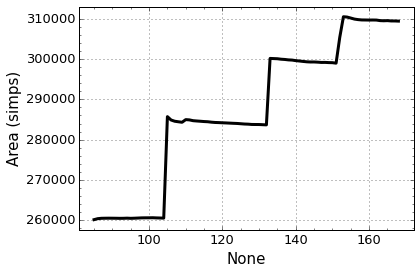

In [326]:
expts.area().plot()

## Import Simulation Dataset

In [327]:
s=LayerSimParser.load_pickle('../Simulations/glyctt_c396_k0.mpickle')
s.backend='skspec'
ref=s.primary_panel()['R_avg'].ix[425:680,(0,15,23,26,29)]
###only select the curves corresponding to experimental spectra:(0,1,15,23,26,29)

## Compare the Reflection & Abs

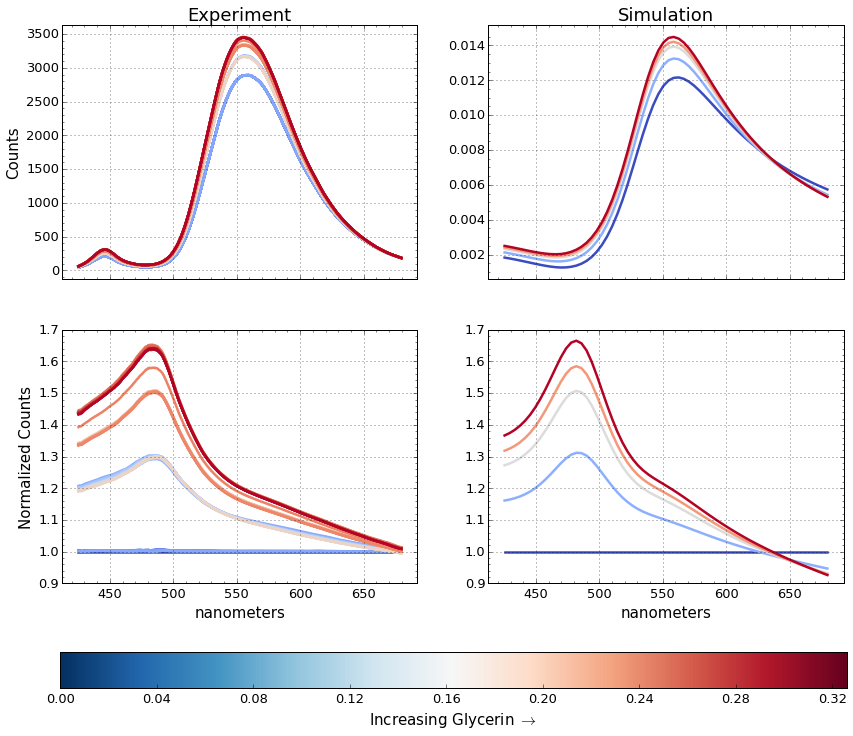

In [328]:
fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,10))

expts.plot(ax=ax1, title='Experiment', **kwds) #Glycerin 0-32.6%'
ref.plot(ax=ax2, title='Simulation', **kwds) #AuNP coverage 39.6%, Glycerin 0-32.6%

ax1.set_ylabel('Counts')
ax2.set_ylabel('')
expts.reference = 0
expts.plot(ax=ax3,norm='r',title='', **kwds)

ref.reference = 0
ref.plot(ax=ax4,norm='r', title='', **kwds)

ax3.set_ylabel('Normalized Counts')
ax4.set_ylabel('')
ax3.set_ylim(0.9,1.7)
ax4.set_ylim(0.9,1.7)

pv_utils.hide_axis(ax1, axis='x')
pv_utils.hide_axis(ax2, ticklabels = 'True')

#x1 y1 x2 y2
cax = fig.add_axes([0.123, -0.02, 0.78, 0.05])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=0.326)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(cax, cmap='RdBu_r',
                                   norm=norm,
                                   orientation='horizontal')
cb1.set_label(r'Increasing Glycerin $\rightarrow$', fontsize=15)

#plt.savefig('/Users/zhaowenliu/Desktop/glyc.png', dpi=600)

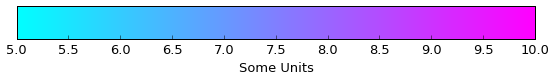

In [329]:
fig = pyplot.figure(figsize=(8,3))

cax = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                   norm=norm,
                                   orientation='horizontal')
cb1.set_label('Some Units')

Compare the glyecrol concentration in experiments and simulation:

In [330]:
glyc_con= s.inputs['selected_material.Mix.alpha'] #([0,1,15,23,26,29])
print "simulation glycerol concentration:"
print glyc_con[0],glyc_con[15],glyc_con[23],glyc_con[29]

print "experiment gylcerol concentration according to notes:"
print ""

simulation glycerol concentration:
0.0 0.168620689655 0.258551724138 0.326
experiment gylcerol concentration according to notes:

